In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
import requests
from plotnine import *
import regex as re

In [5]:
# read data from csv file
raw_data = pd.read_csv('./datasets/suicide homicide gdp.csv', sep=',')
raw_data.head()

,country,iso3c,iso2c,year,"Intentional homicides (per 100,000 people)","Suicide mortality rate (per 100,000 population)",GDP (current US$),"GDP per capita, PPP (current international $)",adminregion,incomeLevel
0,Afghanistan,AFG,AF,1970,NaN,NaN,1.748887e+09,NaN,South Asia,Low income
1,Afghanistan,AFG,AF,1971,NaN,NaN,1.831109e+09,NaN,South Asia,Low income
2,Afghanistan,AFG,AF,1972,NaN,NaN,1.595555e+09,NaN,South Asia,Low income
3,Afghanistan,AFG,AF,1973,NaN,NaN,1.733333e+09,NaN,South Asia,Low income
4,Afghanistan,AFG,AF,1974,NaN,NaN,2.155555e+09,NaN,South Asia,Low income


In [6]:
homicides = 'Intentional homicides (per 100,000 people)'
suicides = 'Suicide mortality rate (per 100,000 population)'
gdp = 'GDP (current US$)'
gdp_pc = 'GDP per capita, PPP (current international $)'

# data = raw_data.dropna()
data = raw_data
data = data.rename(columns={f'{gdp}': 'gdp', f'{gdp_pc}': 'gdp_pc', f'{suicides}': 'suicides'})
# data = data.rename(columns={f'{gdp_pc}': gdp_pc.replace('$', 'dollars')})
display(data[data['country'] == 'Afghanistan'])

,country,iso3c,iso2c,year,"Intentional homicides (per 100,000 people)",suicides,gdp,gdp_pc,adminregion,incomeLevel
0,Afghanistan,AFG,AF,1970,NaN,NaN,1.748887e+09,NaN,South Asia,Low income
1,Afghanistan,AFG,AF,1971,NaN,NaN,1.831109e+09,NaN,South Asia,Low income
2,Afghanistan,AFG,AF,1972,NaN,NaN,1.595555e+09,NaN,South Asia,Low income
3,Afghanistan,AFG,AF,1973,NaN,NaN,1.733333e+09,NaN,South Asia,Low income
4,Afghanistan,AFG,AF,1974,NaN,NaN,2.155555e+09,NaN,South Asia,Low income
5,Afghanistan,AFG,AF,1975,NaN,NaN,2.366667e+09,NaN,South Asia,Low income
6,Afghanistan,AFG,AF,1976,NaN,NaN,2.555556e+09,NaN,South Asia,Low income
7,Afghanistan,AFG,AF,1977,NaN,NaN,2.953333e+09,NaN,South Asia,Low income
8,Afghanistan,AFG,AF,1978,NaN,NaN,3.300000e+09,NaN,South Asia,Low income
9,Afghanistan,AFG,AF,1979,NaN,NaN,3.697940e+09,NaN,South Asia,Low income


In [7]:
# data.plot(x='year', y=homicides, kind='scatter', logy=True)
# data.plot(x='gdp', y=homicides, kind='scatter', logx=True, logy=True)
# data.plot(x='gdp_pc', y=homicides, kind='scatter', logx=True, logy=True)

# data.plot(x='year', y='suicides', kind='scatter')
# data.plot(x='gdp', y='suicides', kind='scatter')
# data.plot(x='gdp_pc', y='suicides', kind='scatter')

means_across_country = data.groupby('country')[['suicides', 'gdp', 'gdp_pc']].mean()
means_across_time = data.groupby('year')[['suicides', 'gdp', 'gdp_pc']].mean()

display(means_across_country)
display(means_across_time)


,suicides,gdp,gdp_pc
country,,,
Afghanistan,4.460000,9.596627e+09,1615.913011
Africa Eastern and Southern,9.345236,3.929789e+11,2723.406000
Africa Western and Central,6.251779,2.795612e+11,2885.340080
Albania,5.875000,6.882272e+09,6939.364432
Algeria,3.330000,8.110803e+10,10220.884224
...,...,...,...
West Bank and Gaza,NaN,8.474922e+09,4004.624776
World,10.834758,3.564516e+13,10800.926940
"Yemen, Rep.",5.815000,1.823009e+10,3072.311174


,suicides,gdp,gdp_pc
year,,,
1970,NaN,1.317084e+11,NaN
1971,NaN,1.426672e+11,NaN
1972,NaN,1.643819e+11,NaN
1973,NaN,2.028177e+11,NaN
1974,NaN,2.358694e+11,NaN
1975,NaN,2.602780e+11,NaN
1976,NaN,2.801423e+11,NaN
1977,NaN,3.112048e+11,NaN
1978,NaN,3.648487e+11,NaN


In [8]:
# fit linear regression model for life expectancy vs. time
fitted_values_model = smf.ols(formula=f'gdp_pc ~ suicides', data=data).fit()

print(fitted_values_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 gdp_pc   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     18.65
Date:                Wed, 10 May 2023   Prob (F-statistic):           1.60e-05
Time:                        17:46:15   Log-Likelihood:                -50408.
No. Observations:                4497   AIC:                         1.008e+05
Df Residuals:                    4495   BIC:                         1.008e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.407e+04    432.018     32.569      0.0

c:\Users\jange\AppData\Local\Programs\Python\Python310\lib\site-packages\plotnine\layer.py:411: PlotnineWarning: geom_point : Removed 966 rows containing missing values.


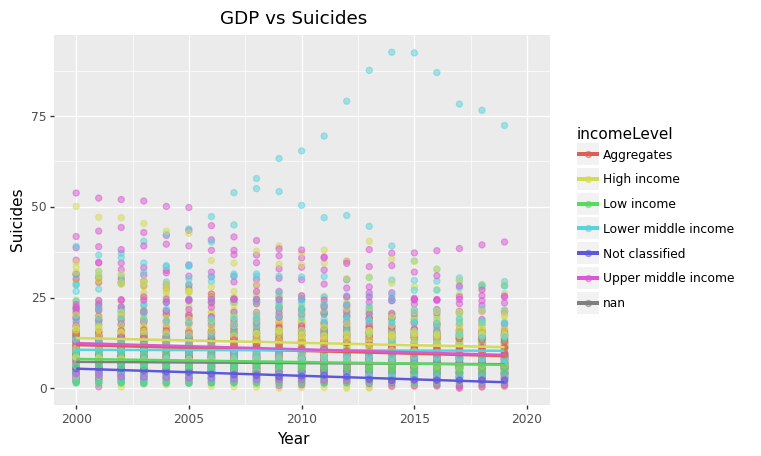

In [9]:
splot = ggplot(data[data['year'] >= 2000], aes(x='year', y='suicides', color='incomeLevel')) +\
    geom_point(size=2, alpha=0.5) + stat_smooth(method='lm', se=False) +\
    labs(title="GDP vs Suicides",
         x = "Year",
         y = "Suicides")

print(splot)

c:\Users\jange\AppData\Local\Programs\Python\Python310\lib\site-packages\plotnine\layer.py:411: PlotnineWarning: geom_point : Removed 966 rows containing missing values.


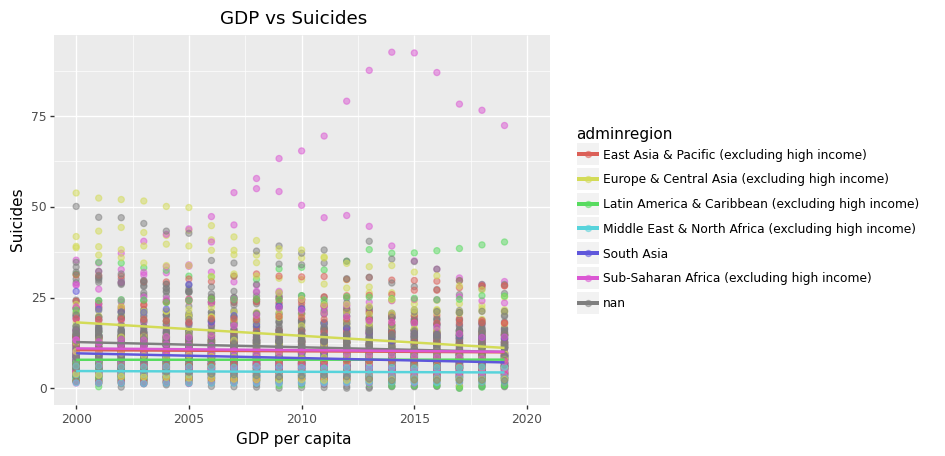

In [10]:
splot = ggplot(data[data['year'] >= 2000], aes(x='year', y='suicides', color='adminregion')) +\
    geom_point(size=2, alpha=0.5) + stat_smooth(method='lm', se=False) +\
    labs(title="GDP vs Suicides",
         x = "GDP per capita",
         y = "Suicides")

print(splot)

c:\Users\jange\AppData\Local\Programs\Python\Python310\lib\site-packages\plotnine\layer.py:411: PlotnineWarning: geom_point : Removed 9069 rows containing missing values.


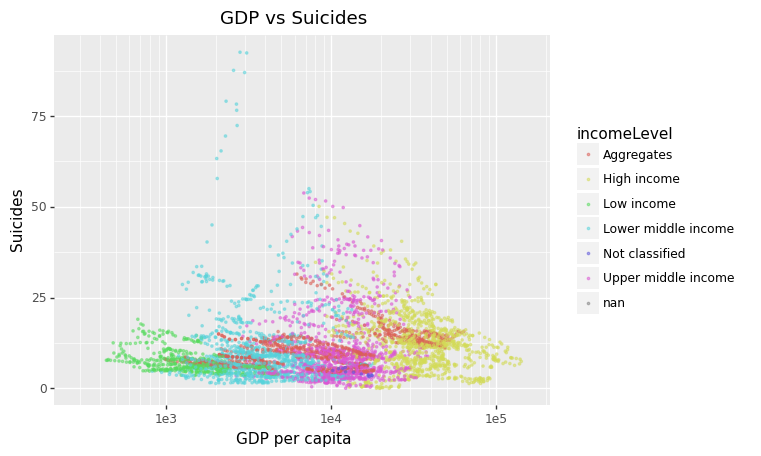

In [11]:
splot = ggplot(data, aes(x='gdp_pc', y='suicides', color='incomeLevel')) +\
    geom_point(size=0.5, alpha=0.5) +\
    labs(title="GDP vs Suicides",
         x = "GDP per capita",
         y = "Suicides") + scale_x_log10()

print(splot)

In [18]:
splot = ggplot(data[data['year'] >= 2000], aes(x='year', y='suicides')) +\
    geom_point(size=2, alpha=0.5) + stat_smooth(method='lm', se=False) +\
    labs(title="Suicides Over Time",
         x = "Year",
         y = "Suicides")

print(splot)

KeyError: 'year'

In [53]:
# cdc_data = requests.get('https://data.cdc.gov')
# display(cdc_data)
raw_data = pd.read_csv('./datasets/sex_race_gender_suicide_data_us.csv')
data = raw_data.drop(columns=['INDICATOR', 'UNIT_NUM', 'STUB_NAME', 'STUB_NAME_NUM', 'STUB_LABEL_NUM', 'YEAR_NUM', 'AGE_NUM'], axis=1)

def find_cat(category, str, label):
    match = re.search(str, label)
    if match == None:
        return 'All ' + category
    else:
        return match.group()

str = r'(Male|Female)'
data['SEX'] = data['STUB_LABEL'].apply(lambda label: find_cat('sex', str, label))

str = r'(White|Black or African American|Asian or Pacific Islander|American Indian or Alaska Native)'
data['RACE'] = data['STUB_LABEL'].apply(lambda label: find_cat('race', str, label))

str = r'(Not Hispanic or Latino|Hispanic or Latino)'
data['ETHNICITY'] = data['STUB_LABEL'].apply(lambda label: find_cat('ethnicity', str, label))

display(data)

,UNIT,STUB_LABEL,YEAR,AGE,ESTIMATE,FLAG,SEX,RACE,ETHNICITY
0,"Deaths per 100,000 resident population, age-ad...",All persons,1950,All ages,13.2,NaN,All sex,All race,All ethnicity
1,"Deaths per 100,000 resident population, age-ad...",All persons,1960,All ages,12.5,NaN,All sex,All race,All ethnicity
2,"Deaths per 100,000 resident population, age-ad...",All persons,1970,All ages,13.1,NaN,All sex,All race,All ethnicity
3,"Deaths per 100,000 resident population, age-ad...",All persons,1980,All ages,12.2,NaN,All sex,All race,All ethnicity
4,"Deaths per 100,000 resident population, age-ad...",All persons,1981,All ages,12.3,NaN,All sex,All race,All ethnicity
...,...,...,...,...,...,...,...,...,...
6385,"Deaths per 100,000 resident population, crude",Female: Not Hispanic or Latino: Black or Afric...,2018,65 years and over,1.3,NaN,Female,Black or African American,Not Hispanic or Latino
6386,"Deaths per 100,000 resident population, crude",Female: Hispanic or Latino: All races: 15-24 y...,2018,15-24 years,4.1,NaN,Female,All race,Hispanic or Latino
6387,"Deaths per 100,000 resident population, crude",Female: Hispanic or Latino: All races: 25-44 y...,2018,25-44 years,4.4,NaN,Female,All race,Hispanic or Latino
6388,"Deaths per 100,000 resident population, crude",Female: Hispanic or Latino: All races: 45-64 y...,2018,45-64 years,3.2,NaN,Female,All race,Hispanic or Latino


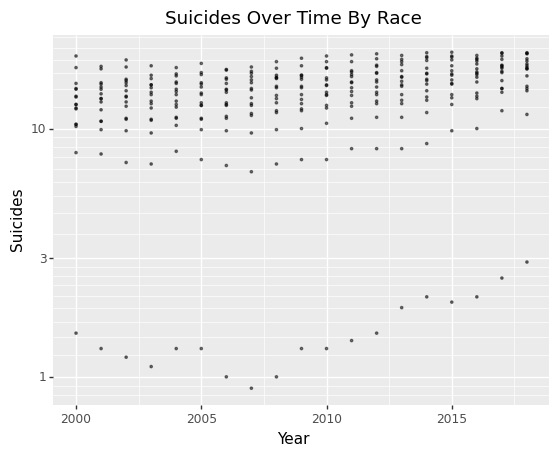

In [75]:
splot = ggplot(data[(data['YEAR'] >= 2000) & (data['RACE'] == 'All race') & (data['SEX'] == 'All sex') & (data['ETHNICITY'] == 'All ethnicity')], aes(x='YEAR', y='ESTIMATE', color='RACE')) +\
    geom_point(size=0.5, alpha=0.5) +\
    labs(title="Suicides Over Time By Race",
         x = "Year",
         y = "Suicides") + scale_y_log10()

# splot = ggplot(data[data['STUB_LABEL'] != 'All persons'], aes(x='YEAR', y='ESTIMATE', color='STUB_LABEL')) +\
#     geom_point(size=0.5, alpha=0.5) +\
#     labs(title="Suicides Over Time By Race",
#          x = "Year",
#          y = "Suicides") + scale_y_log10()

print(splot)